-------------
### ライブラリのインポート

In [7]:
# 基本的なライブラリ
import numpy as np
import pandas as pd
from numpy.typing import NDArray
from scipy import stats

# タイピングのサポート
from typing import Optional

# 可視化の設定
import matplotlib.pyplot as plt
import japanize_matplotlib
import itertools

from matplotlib.ticker import FuncFormatter

plt.style.use("ggplot")

--------------
### 辞書作成

実験設定

In [8]:
TARGET = "BCR"

if TARGET == "GMV":
    X_LIM_VAR = 3e5
    X_TICKS = [2e3, 2e4, 2e5]
    LABELS = ["2e3", "2e4", "2e5"]
if TARGET == "BCR":
    X_LIM_VAR = 3e-3
    X_TICKS = [2e-3, 2e-4, 2e-5]
    LABELS = ["2e-3", "2e-4", "2e-5"]


random_color = "#a9a9a9"
kmeans_p_color = "#f0b87a"
kmeans_o_color = "#c04e33"
once_p_color = "#b87a76"
once_o_color = "#6b1314"

各ファイルからコピペ

In [9]:
dict_100 = {
    "SFS-Kmeans-Var（最適標本配分）": 0.0022093994576861463,
    "SFS-Kmeans-Var（比例配分）": 0.0021506082252609744,
    "Kmeans（最適標本配分）": 0.0023090286383850144,
    "Kmeans（比例配分）": 0.002258015691261193,
    "Random": 0.002519417916,
}
dict_1000 = {
    "SFS-Kmeans-Var（最適標本配分）": 0.000217609405530702,
    "SFS-Kmeans-Var（比例配分）": 0.0002188283116216663,
    "Kmeans（最適標本配分）": 0.00022626416430892942,
    "Kmeans（比例配分）": 0.00022631557576274642,
    "Random": 0.00024276052159000007,
}
dict_10000 = {
    "SFS-Kmeans-Var（最適標本配分）": 1.877328748048238e-05,
    "SFS-Kmeans-Var（比例配分）": 1.8965471164100427e-05,
    "Kmeans（最適標本配分）": 2.016501238397456e-05,
    "Kmeans（比例配分）": 2.0389799886651402e-05,
    "Random": 2.2632890459900006e-05,
}


In [10]:
def make_var_dict(dict_100, dict_1000, dict_10000) -> dict:
    var_dict = {}
    var_dict["100"] = dict_100
    var_dict["1000"] = dict_1000
    var_dict["10000"] = dict_10000

    return var_dict

In [11]:
var_dict = make_var_dict(dict_100=dict_100, dict_1000=dict_1000, dict_10000=dict_10000)

In [12]:
print(var_dict)

{'100': {'SFS-Kmeans-Var（最適標本配分）': 0.0022093994576861463, 'SFS-Kmeans-Var（比例配分）': 0.0021506082252609744, 'Kmeans（最適標本配分）': 0.0023090286383850144, 'Kmeans（比例配分）': 0.002258015691261193, 'Random': 0.002519417916}, '1000': {'SFS-Kmeans-Var（最適標本配分）': 0.000217609405530702, 'SFS-Kmeans-Var（比例配分）': 0.0002188283116216663, 'Kmeans（最適標本配分）': 0.00022626416430892942, 'Kmeans（比例配分）': 0.00022631557576274642, 'Random': 0.00024276052159000007}, '10000': {'SFS-Kmeans-Var（最適標本配分）': 1.877328748048238e-05, 'SFS-Kmeans-Var（比例配分）': 1.8965471164100427e-05, 'Kmeans（最適標本配分）': 2.016501238397456e-05, 'Kmeans（比例配分）': 2.0389799886651402e-05, 'Random': 2.2632890459900006e-05}}


C:\Users\HaruMomozu\AppData\Local\Temp\ipykernel_20960\787020256.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


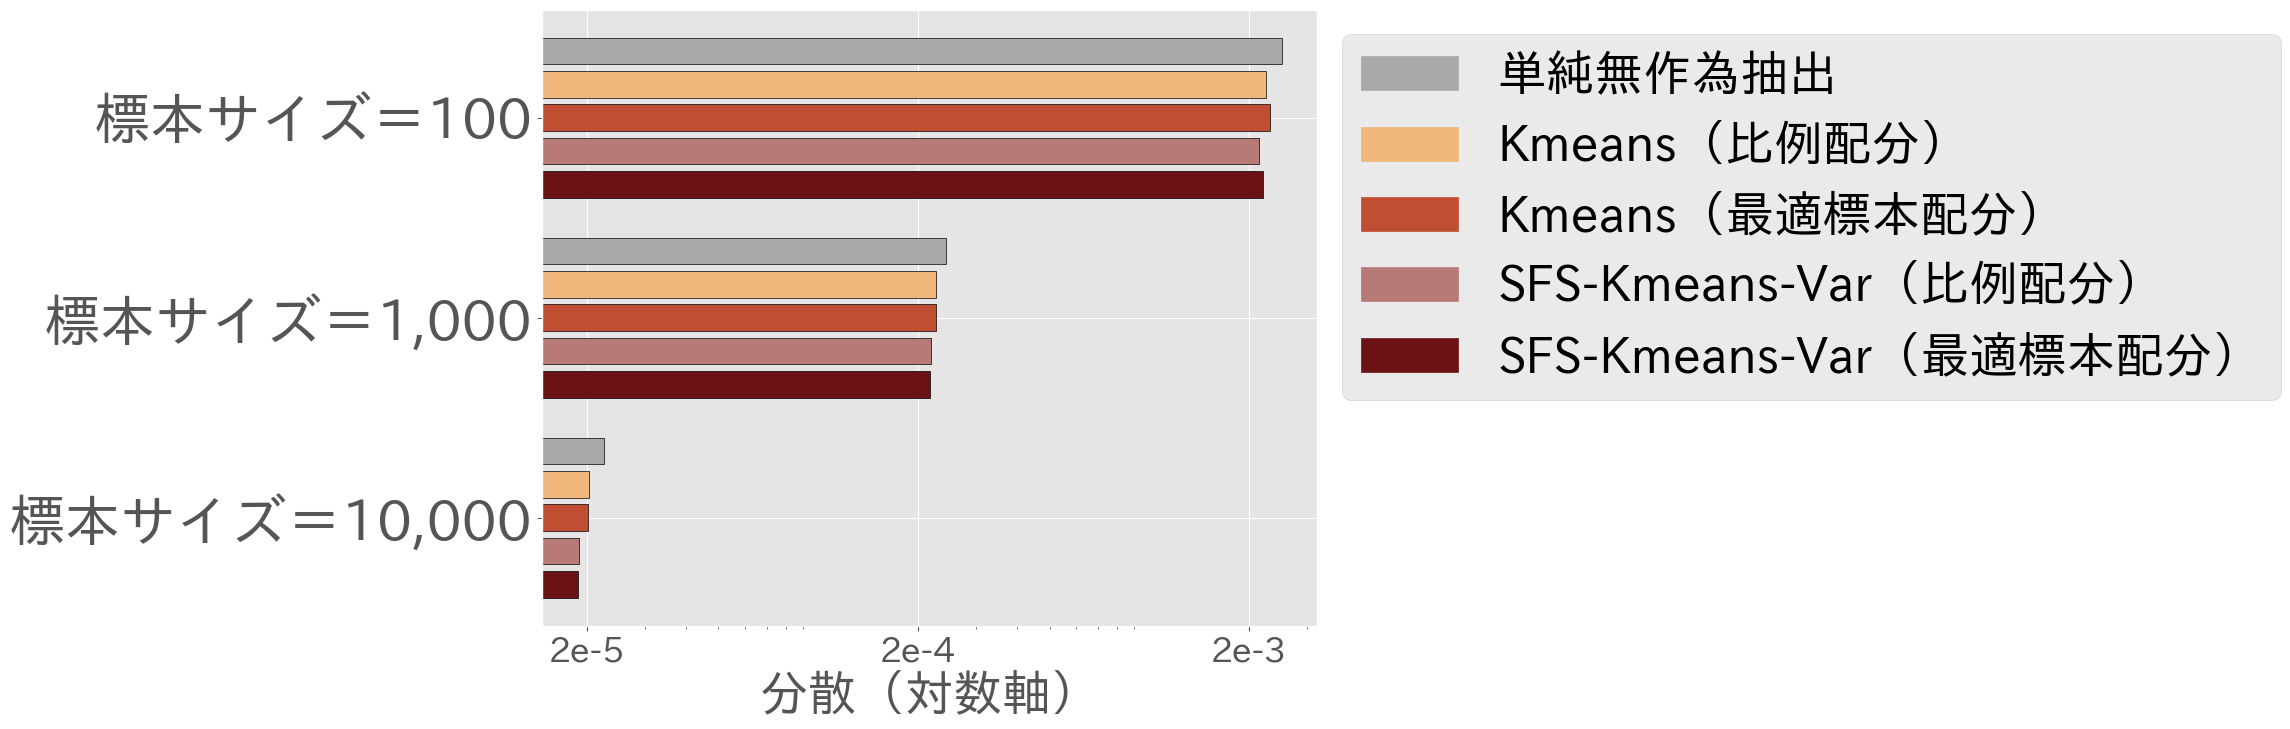

In [13]:
# グラフ用データを準備
labels = [
    "標本サイズ＝10,000",
    "標本サイズ＝1,000",
    "標本サイズ＝100",
]
values = (
    list(var_dict["10000"].values())
    + [0]
    + list(var_dict["1000"].values())
    + [0]
    + list(var_dict["100"].values())
)

# 各グループに色を割り当て、間隔には透明な色を使用
colors = (
    [once_o_color, once_p_color, kmeans_o_color, kmeans_p_color, random_color]
    + ["#FFFFFF00"]
    + [once_o_color, once_p_color, kmeans_o_color, kmeans_p_color, random_color]
    + ["#FFFFFF00"]
    + [once_o_color, once_p_color, kmeans_o_color, kmeans_p_color, random_color]
)

# 各ラベルが3つの棒の真ん中に配置されるように位置を調整
y_positions = [2, 8, 14]

# グラフを描画
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(range(len(values)), values, color=colors, edgecolor="black")

# 凡例の追加
legend_labels = [
    "単純無作為抽出",
    "Kmeans（比例配分）",
    "Kmeans（最適標本配分）",
    "SFS-Kmeans-Var（比例配分）",
    "SFS-Kmeans-Var（最適標本配分）",
]
# 色のリスト
legend_colors = [
    random_color,
    kmeans_p_color,
    kmeans_o_color,
    once_p_color,
    once_o_color,
]
# 各ラベルに対してハンドルを作成
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in legend_colors]
ax.legend(handles, legend_labels, fontsize=35, loc="upper left", bbox_to_anchor=(1, 1))

# y軸の目盛りとラベルを設定
ax.set_yticks(y_positions)
ax.tick_params(axis="x", labelsize=25)
ax.set_yticklabels(labels, fontsize=40)


ax.set_xlabel("分散（対数軸）", fontsize=35)
ax.set_xscale("log")
log_ticks = X_TICKS
ax.set_xscale("log")
ax.set_xticks(log_ticks, labels=LABELS)

plt.tight_layout()
plt.show()

-----------
### 追加の標本サイズの表用

In [14]:
def make_delta_dict(var_dict: dict) -> dict:
    delta_dict = {}
    for sample_size, dict in var_dict.items():
        delta_dict[sample_size] = {}
        for method, var in dict.items():
            if method != "Random":
                delta = format(var_dict[sample_size]["Random"] - var, ".1e")
                delta_dict[sample_size][method] = delta
    return delta_dict

In [15]:
delta_dict = make_delta_dict(var_dict=var_dict)
print(delta_dict)

{'100': {'SFS-Kmeans-Var（最適標本配分）': '3.1e-04', 'SFS-Kmeans-Var（比例配分）': '3.7e-04', 'Kmeans（最適標本配分）': '2.1e-04', 'Kmeans（比例配分）': '2.6e-04'}, '1000': {'SFS-Kmeans-Var（最適標本配分）': '2.5e-05', 'SFS-Kmeans-Var（比例配分）': '2.4e-05', 'Kmeans（最適標本配分）': '1.6e-05', 'Kmeans（比例配分）': '1.6e-05'}, '10000': {'SFS-Kmeans-Var（最適標本配分）': '3.9e-06', 'SFS-Kmeans-Var（比例配分）': '3.7e-06', 'Kmeans（最適標本配分）': '2.5e-06', 'Kmeans（比例配分）': '2.2e-06'}}


In [16]:
def make_additional_size_dict(var_dict: dict) -> tuple[dict, dict]:
    k_dict = {}
    additional_size_dict = {}
    for sample_size, dict in var_dict.items():
        k_dict[sample_size] = {}
        additional_size_dict[sample_size] = {}
        for method, var in dict.items():
            if method != "Random":
                k = var / var_dict[sample_size]["Random"]
                k_dict[sample_size][method] = round(k, 3)
                additional_size = int(sample_size) / k - int(sample_size)
                additional_size_dict[sample_size][method] = round(additional_size, 3)
    return k_dict, additional_size_dict

In [17]:
k_dict, additional_size_dict = make_additional_size_dict(var_dict=var_dict)
print(k_dict)
print(additional_size_dict)

{'100': {'SFS-Kmeans-Var（最適標本配分）': 0.877, 'SFS-Kmeans-Var（比例配分）': 0.854, 'Kmeans（最適標本配分）': 0.916, 'Kmeans（比例配分）': 0.896}, '1000': {'SFS-Kmeans-Var（最適標本配分）': 0.896, 'SFS-Kmeans-Var（比例配分）': 0.901, 'Kmeans（最適標本配分）': 0.932, 'Kmeans（比例配分）': 0.932}, '10000': {'SFS-Kmeans-Var（最適標本配分）': 0.829, 'SFS-Kmeans-Var（比例配分）': 0.838, 'Kmeans（最適標本配分）': 0.891, 'Kmeans（比例配分）': 0.901}}
{'100': {'SFS-Kmeans-Var（最適標本配分）': 14.032, 'SFS-Kmeans-Var（比例配分）': 17.149, 'Kmeans（最適標本配分）': 9.112, 'Kmeans（比例配分）': 11.577}, '1000': {'SFS-Kmeans-Var（最適標本配分）': 115.579, 'SFS-Kmeans-Var（比例配分）': 109.365, 'Kmeans（最適標本配分）': 72.908, 'Kmeans（比例配分）': 72.664}, '10000': {'SFS-Kmeans-Var（最適標本配分）': 2055.901, 'SFS-Kmeans-Var（比例配分）': 1933.735, 'Kmeans（最適標本配分）': 1223.842, 'Kmeans（比例配分）': 1100.104}}


In [18]:
for size, dict in delta_dict.items():
    print(f"[size:{size}]")
    for method, delta in dict.items():
        print(
            f"{method}:delta={delta}, k={k_dict[size][method]}, addi={additional_size_dict[size][method]}"
        )

[size:100]
SFS-Kmeans-Var（最適標本配分）:delta=3.1e-04, k=0.877, addi=14.032
SFS-Kmeans-Var（比例配分）:delta=3.7e-04, k=0.854, addi=17.149
Kmeans（最適標本配分）:delta=2.1e-04, k=0.916, addi=9.112
Kmeans（比例配分）:delta=2.6e-04, k=0.896, addi=11.577
[size:1000]
SFS-Kmeans-Var（最適標本配分）:delta=2.5e-05, k=0.896, addi=115.579
SFS-Kmeans-Var（比例配分）:delta=2.4e-05, k=0.901, addi=109.365
Kmeans（最適標本配分）:delta=1.6e-05, k=0.932, addi=72.908
Kmeans（比例配分）:delta=1.6e-05, k=0.932, addi=72.664
[size:10000]
SFS-Kmeans-Var（最適標本配分）:delta=3.9e-06, k=0.829, addi=2055.901
SFS-Kmeans-Var（比例配分）:delta=3.7e-06, k=0.838, addi=1933.735
Kmeans（最適標本配分）:delta=2.5e-06, k=0.891, addi=1223.842
Kmeans（比例配分）:delta=2.2e-06, k=0.901, addi=1100.104
